<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 1 - Context</h1>

<figure>
<img src="resources/trawler.jpg" alt="Trawler image." width="400">
<figcaption> <i>Fig 1.1. Trawler image generated by <a href=https://deepai.org>DeepAi.org</a>.</i></figcaption>
</figure>

<h2 style='font-size: 18px; font-weight: bold'>Scenario: Fish Species Classification</h2>

<p style='text-align: justify'> From this smart fishing trawler company, I was given a project to <b>classify</b> the fishes that are caught by their trawlers.

Their newly installed smart IoT sensors can measure different features of the fishes right after catching them, and label them in a large-scale.

As the *marine data scientist*, with a collected dataset of the specific region, I am here to develop a **classification machine learning model** to predict the species of the fishes caught by the trawler.</p>

<h2 style='font-size: 18px; font-weight: bold'>Values</h2>
<p style='text-align: justify'>A successful machine learning model from this project, can possibly lead to:

1. **Automate** the process of classification, which can make the process efficient with less human intervention to classify the fishes, effectively placing them in separate containers.

2. **Expand** to larger number of fishes' dataset, which could be used for other trawlers that have the sensors equipped.

3. **Prevent** catching younger fishes that need to be released. Once they are classified as juveniles, they will be released as they don't have sales value.</p>

<h2 style='font-size: 18px; font-weight: bold'>Quality Criteria</h2>
<p style='text-align: justify'> The model's performance can be analysed with the following:

1. **F1-Score (macro-averaged)**: There could be minor misclassifications, and macro-averaged F1-Score can help to reduce this tendency.<br>To balance precision and recall, this metric will be useful to ensure that the model performs well in identifying how many predicted fishes of a species are actually correct (precision), and how many fishes of a species were correctly identified (recall).<br>There are several species involved so for such multiclass, it would not be suitable to use F1-Score that deals with binary classification.

2. **Accuracy**: It takes into account that the class distribution is relatively even - it measures the percentage of correct predictions, both true positive and true negatives. It also gives a simple summary of the model performance, as it shows the overall correctness of the model.

</p>

</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 2 - The Data</h1>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Reference</h2>
<p>

* Source: https://data.mendeley.com/datasets/bgsx9fjw4d/2
* Publish Date: 25 February 2025
* Authors: Anushka Tonk, SASITHRADEVI A, Vijayalakshmi M
* License: CC BY 4.0
* Purpose: This dataset is used for training a classification model to predict fish species based on physical attributes such as weight, length, height, and width.
</p>

</div>

### Libraries

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import PowerTransformer

from sklearn.dummy import DummyClassifier

In [33]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream


### Dataset Overview

| Features | Description |
|----------|----------|
| Weight | The average weight of an individual fish in grams (g). |
| Length | Different lengths of an individual fish in centimetres (cm). <br> 3 lengths are given in this dataset: Length1, Length2, Length3. |
| Height | The average height of an individual fish in centimetres (cm). |
| Width | The average width of an individual fish in centimetres (cm). |
| Species | The species of an individual fish. |

<div class='alert alert-block alert-warning'>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Suitability</h2>
<p style='text-align: justify'> This dataset is well-suited for the task of developing a classification model to predict fish species as it consists of several important physical features used to distinguish between species.

These features reflect the fish’s morphology such as weight, lengths, height, and width.

<figure>
<img src="resources/fish_length.jpg" alt="Measurements of fish length." width="400">
<figcaption> <i>Fig 2.1. Measurements of different fish lengths from <a href=https://www.fsl.orst.edu/geowater/FX3/help/9_Fish_Performance/Measures_of_Fish_Length.htm>
Corvallis Forestry Research Community</a>.</i></figcaption>
</figure>

The 3 lengths in the dataset, at first sight, refer to **(1) standard length** (Length1), **(2) fork length** (Length2), and **(3) total length** (Length3) *(from shortest to longest)*.<br>
This will be checked later again in the EDA stage.

The dataset includes multiple species with representative sample sizes and average measurements for each.<br>This diversity and detailed feature set make the dataset ideal for predictive modeling and species classification tasks.</p>

</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 3 – IDA (Initial Data Analysis)</h1>
</div>

In [4]:
df.shape

(7159, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7159 entries, 0 to 7158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   7159 non-null   float64
 1   Length1  7159 non-null   float64
 2   Length2  7159 non-null   float64
 3   Length3  7159 non-null   float64
 4   Height   7159 non-null   float64
 5   Width    7159 non-null   float64
 6   Species  7159 non-null   object 
dtypes: float64(6), object(1)
memory usage: 391.6+ KB


<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Information</h2>

* The dataset consists of **7159 rows** and **7 columns**.

* About the **7 columns**: **6** are of datatype **`float64`** (Weight, Length1, Length2, Length3, Height, Width), **1** is datatype **`object`** (Species).

* No **missing values** were found in this dataset.
</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 4 – EDA and Preprocessing</h1>
</div>

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000
mean,442.452424,26.049658,27.972440,44.186604,8.502478,4.762519
std,380.614537,10.978722,11.925595,39.704131,4.056575,1.847965
min,0.000000,7.100000,8.000000,8.000000,1.002400,1.001700
25%,131.000000,18.100000,19.200000,25.050000,6.265850,3.116850
50%,335.000000,25.500000,27.600000,34.400000,8.572800,4.628000
75%,711.000000,32.100000,34.700000,42.900000,10.830000,6.332000
max,1650.000000,59.000000,63.900000,228.800000,19.000000,8.142000


<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Lengths' Relationship</h2>

* First, we can see the relationship for lengths, across `mean`, `min`, `25%`, `50%`, `75%` and `max`, that they're increasing in this manner:
* **Length1 < Length2 < Length3**
* Therefore, we can presume that the initial assumption about this relationship respectively:
1. **Length1:** standard length
2. **Length2:** fork length
3. **Length3:** total length
</div>

<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Anything Off?</h2>

* From here, we'll clean the data where the `min` weight is `0.0`. Let's take a look at where this data is coming from.
* Standard deviation `std` here shows high variability. This will be considered later for transformation.
* Length3 has a large value for `max` at `228.8`. This will be investigated.
</div>

In [11]:
df[df['Weight'] == 0.0]

,Weight,Length1,Length2,Length3,Height,Width,Species
40,0.0,19.0,20.5,22.8,6.4752,3.3516,Roach
5953,0.0,23.8,30.6,23.4,9.5023,3.9291,Roach
6090,0.0,26.0,20.2,28.7,7.1328,5.8262,Roach


<div class='alert alert-block alert-info'>

* In this context, these are probably roach juveniles that have < 1 gram for their weights.
* However, it still does not make sense to have a `0.0` weight. Therefore, these 3 rows will be removed.
* It seems a bit hard to interpret the data as it is, as these juvenile fishes seem to be quite big in size.
* We'll figure out later if these juvenile fishes (or miscalculated) should be removed.
</div>

In [49]:
# Get indices of rows where weight == 0.0
indices_to_drop = df[df['Weight'] == 0.0].index

# Drop those indices
df_filtered = df.drop(indices_to_drop)
df_filtered.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,442.637912,26.050964,27.974203,44.194662,8.502813,4.762684
std,380.586456,10.980674,11.927373,39.710466,4.057305,1.848208
min,1.000000,7.100000,8.000000,8.000000,1.002400,1.001700
25%,131.000000,18.100000,19.200000,25.100000,6.264675,3.116025
50%,335.500000,25.500000,27.600000,34.400000,8.573500,4.628400
75%,711.000000,32.100000,34.700000,42.900000,10.830900,6.332250
max,1650.000000,59.000000,63.900000,228.800000,19.000000,8.142000


<div class='alert alert-block alert-info'>

* The `min` weight is still at `1.0` but this value will not be excluded for now, unless we see below if low/high values are anomalies affecting classification.
</div>

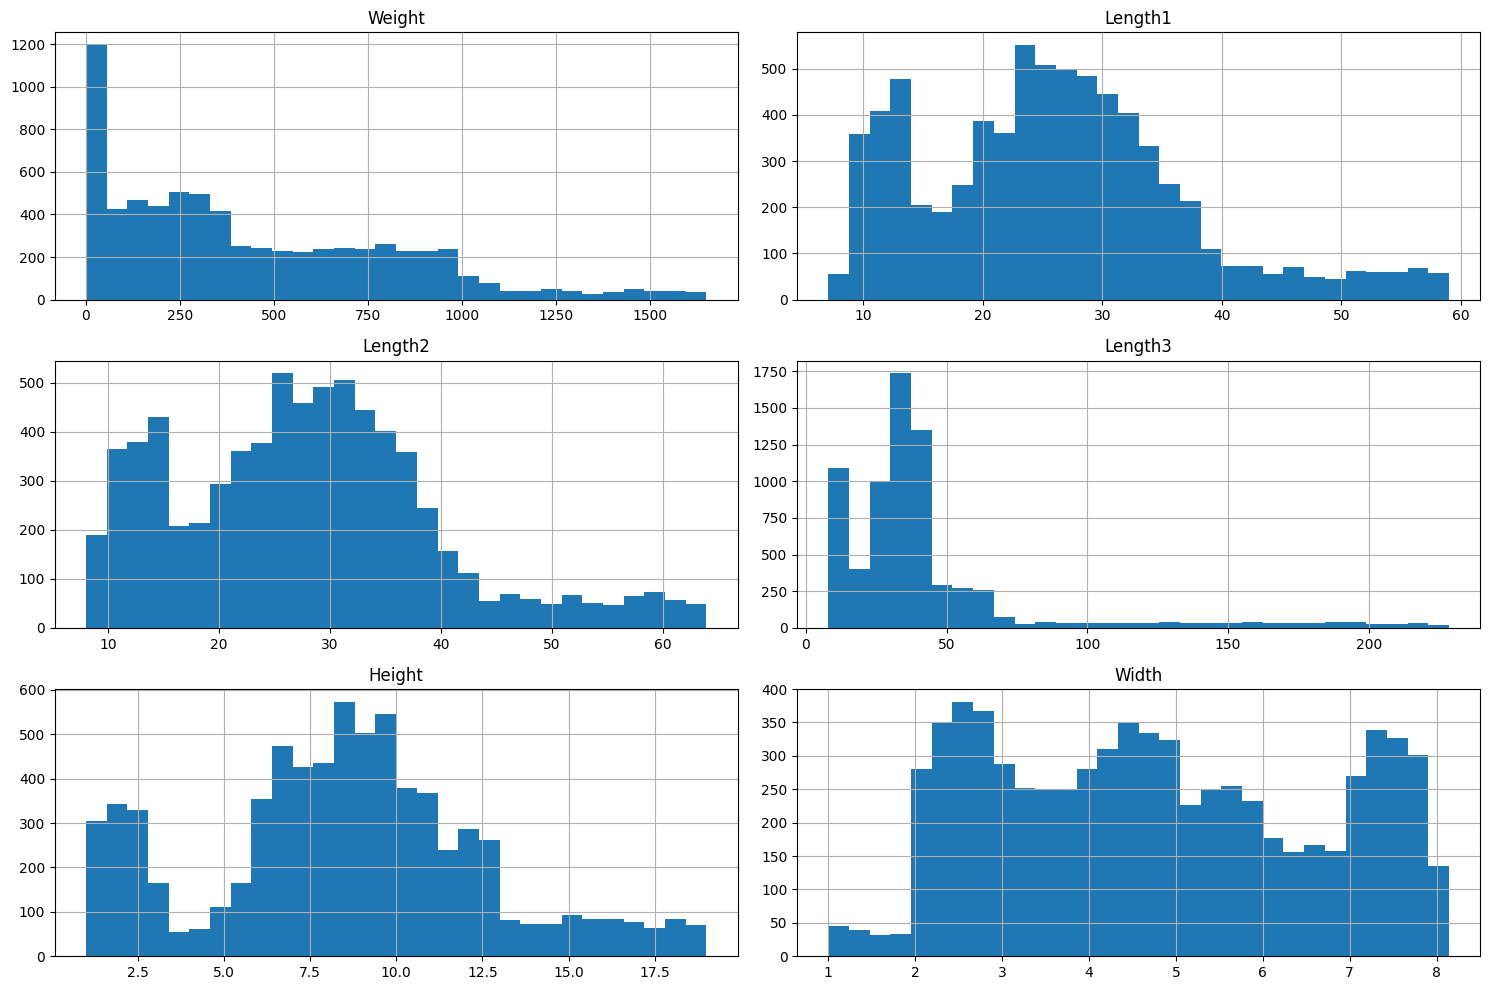

In [40]:
# Select only numerical columns for histogram plotting
columns_numerical = df_filtered.select_dtypes(include=['float64']).columns  
df_filtered[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [36]:
# Skewness of numerical features
skew = df_filtered[columns_numerical].skew() 
print(skew)

Weight     0.884138
Length1    0.649589
Length2    0.629312
Length3    2.695632
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Histogram & Skewness Analysis</h2>

* Here we see `Length3` highly right-skewed, and when we checked the description of the dataset, we found out that the `max` was very high.

* This could be a data collection issue for the total length with wrong measurements. <br>There shouldn't be a big difference between fork length (`Length2`) and total length (`Length3`).

* Therefore, this `Length3` will be discarded.

* `Weight`, `Length1` and `Length2` seem to be moderately right-skewed, where `Weight` also has about 1200 counts for first 50 grams, considering that this is the weight threshold for juveniles. <br>These fishes will therefore also be filtered out.

* `Length1` and `Length2` will however be transformed with log transformation to fix the right skew.
</div>

In [82]:
# Remove Length3 column
df_filtered_1 = df_filtered.drop(columns=['Length3'])

# Weight only above > 50 grams
df_filtered_1 = df_filtered_1[df_filtered_1['Weight'] > 50]
df_filtered_1['Species'].value_counts()

Species
Bream        1035
Pike         1017
Parkki       1011
Perch        1009
Whitefish    1006
Roach         898
Name: count, dtype: int64

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>What Happened to Smelt?</h2>

<figure>
<img src="resources/smelt.png" alt="My smelt is missing!" width="400">
<figcaption> <i>Fig 2.2. My <a href=https://www.britannica.com/animal/smelt>smelt</a> is missing!</i></figcaption>
</figure>

* Here we see the smelt `Species` missing after the `Weight` was filtered to > 50g. You can see why from the Fig 2.2, it is small in size.

* Since this removes one whole `Species`, it is not accurate to remove them.<br>
Therefore, we'll include the fishes with `Weight` < 50g.
</div>

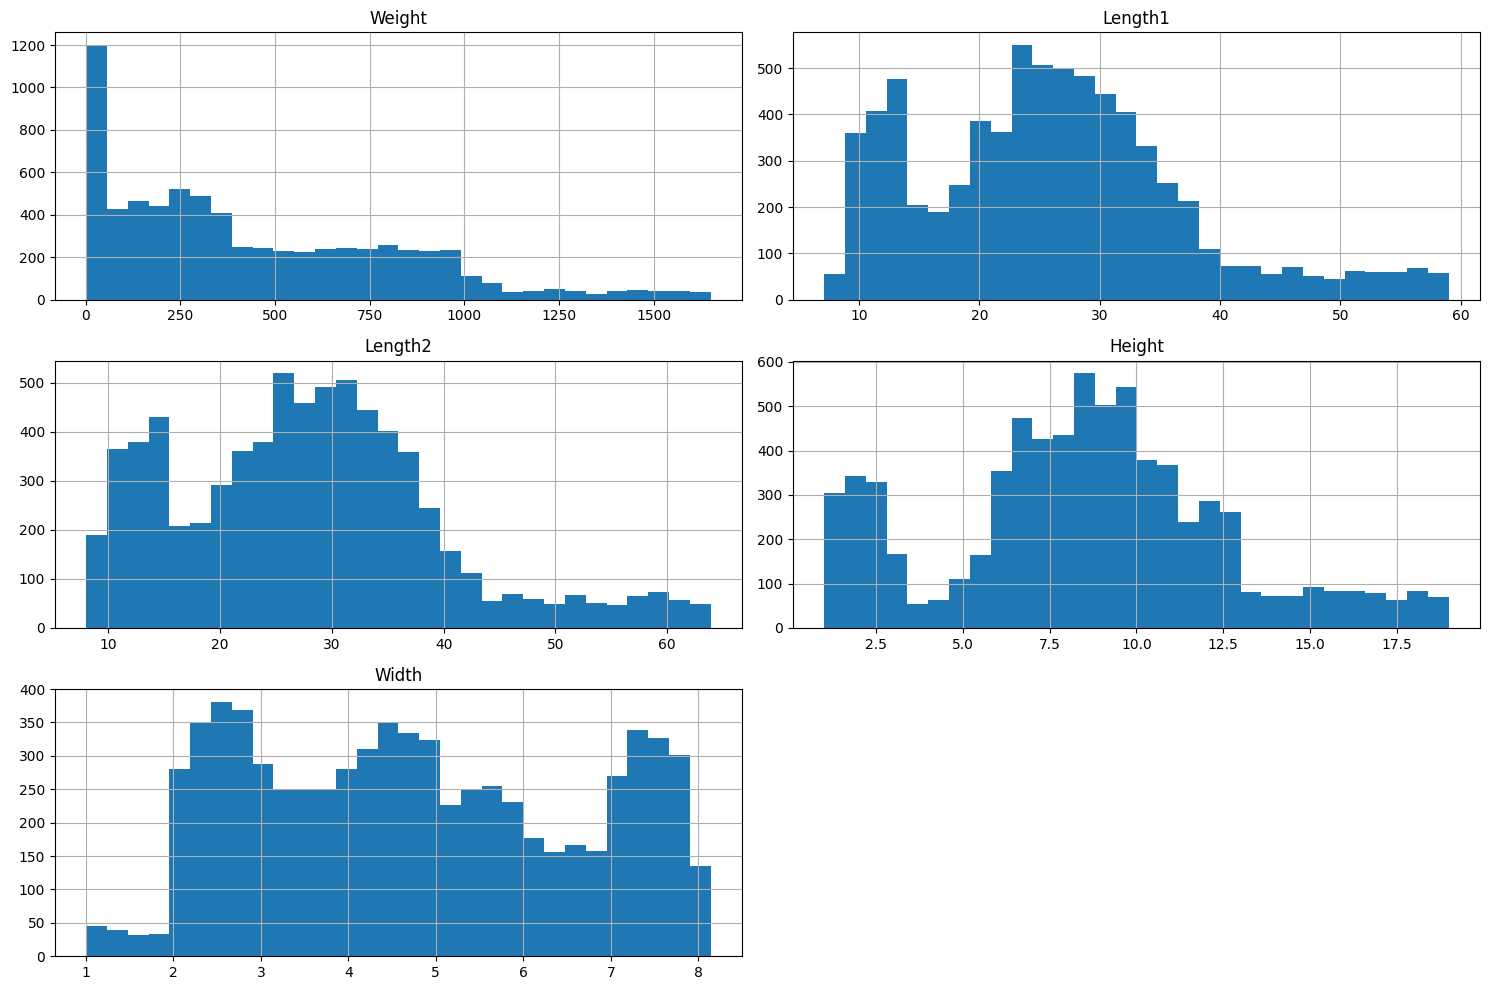

In [84]:
# Remove only Length3 column
df_filtered_new = df_filtered.drop(columns=['Length3'])

# Update numerical columns for histogram plotting
columns_numerical = df_filtered_new.select_dtypes(include=['float64']).columns  
df_filtered_new[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [85]:
# Skewness of numerical features
skew = df_filtered_new[columns_numerical].skew() 
print(skew)

Weight     0.884138
Length1    0.649589
Length2    0.629312
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* With the right skewness for all features except for `Width` and `Height`, we'll transform with log transformation now.
</div>

In [90]:
df_filtered_log = df_filtered_new.copy()

# Apply log transformation to numerical features
df_filtered_log['Weight'] = np.log1p(df_filtered_log['Weight'])
df_filtered_log['Length1'] = np.log1p(df_filtered_log['Length1'])
df_filtered_log['Length2'] = np.log1p(df_filtered_log['Length2'])

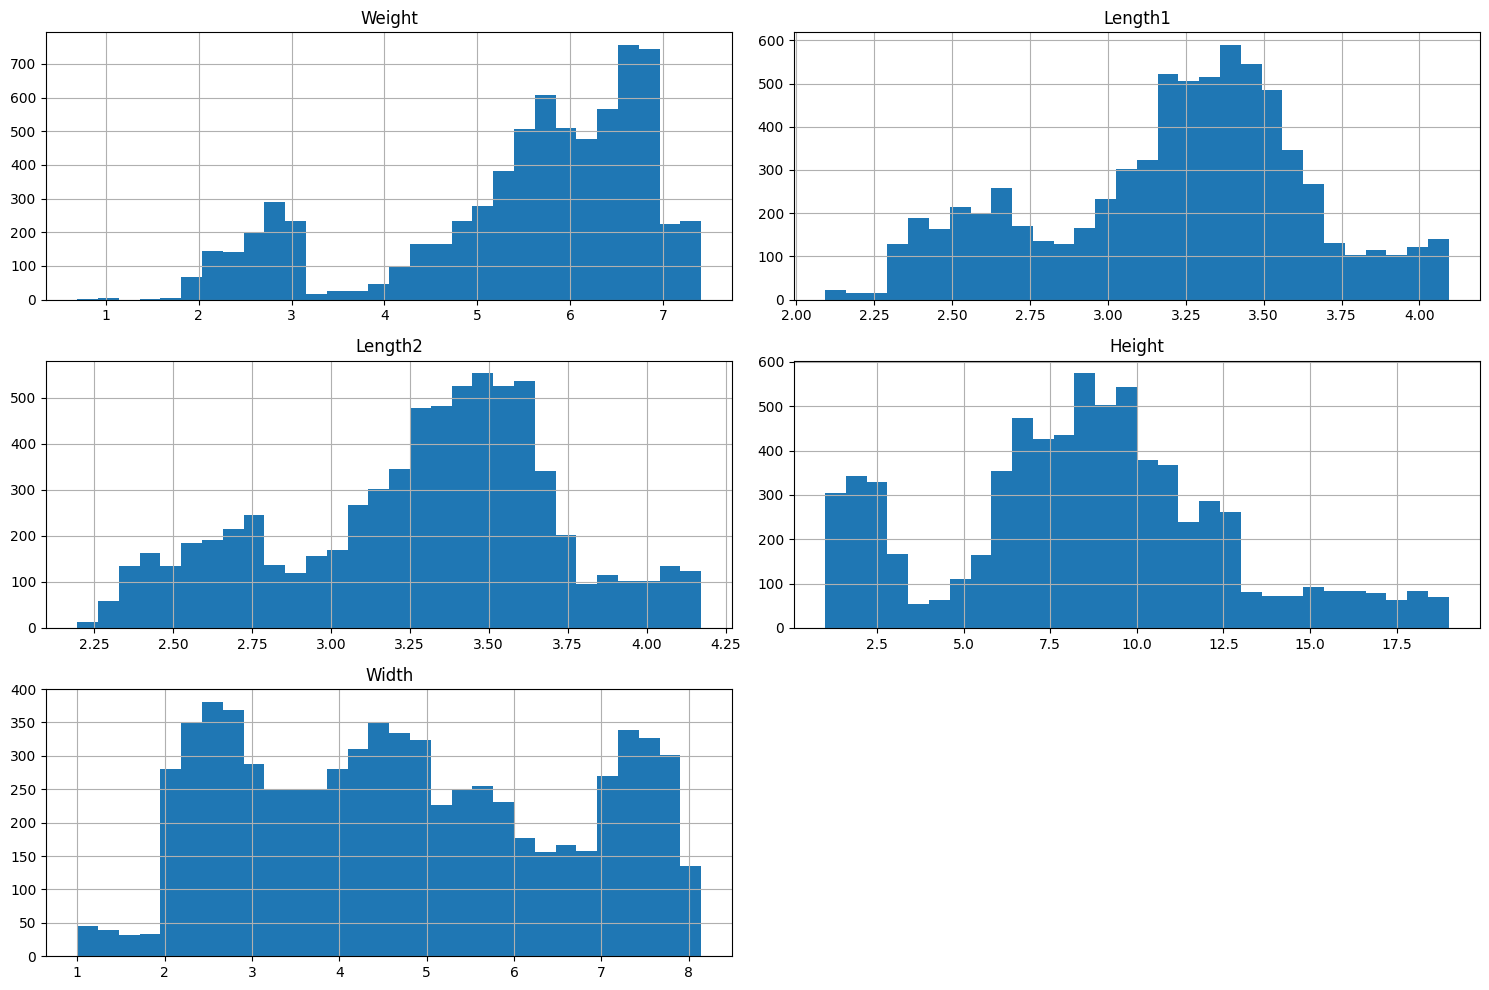

In [91]:
df_filtered_log[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [92]:
# Skewness of numerical features
skew = df_filtered_log[columns_numerical].skew() 
print(skew)

Weight    -1.002523
Length1   -0.355753
Length2   -0.376395
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* `Length1` and `Length2` got better with left skew, but `Weight` now has a worse value.
* We'll apply Yeo-Johnson power transform to see if it helps (applying auto-transformation).
</div>

In [98]:
df_filtered_yj = df_filtered_new.copy()
pt = PowerTransformer(method='yeo-johnson')

df_filtered_yj['Weight'] = pt.fit_transform(df_filtered_yj[['Weight']])
df_filtered_yj['Length1'] = pt.fit_transform(df_filtered_yj[['Length1']])
df_filtered_yj['Length2'] = pt.fit_transform(df_filtered_yj[['Length2']])

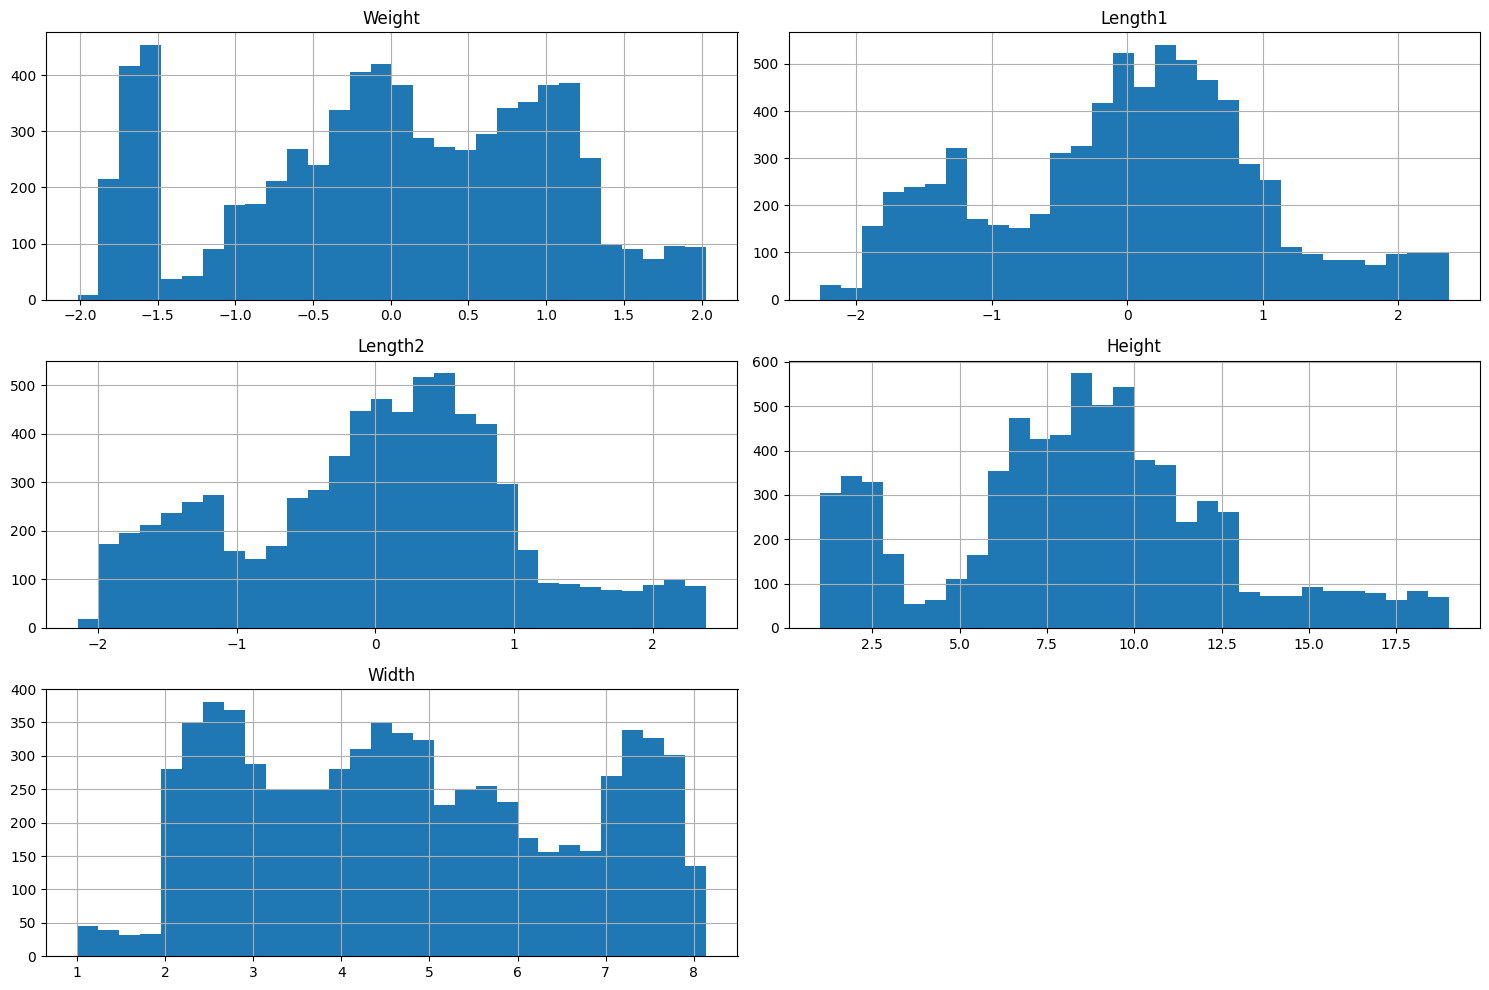

In [99]:
df_filtered_yj[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [100]:
skew = df_filtered_yj[columns_numerical].skew()
print(skew)

Weight    -0.202868
Length1   -0.024150
Length2   -0.027666
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* The skewness is now much better, after the Yeo-Johnson Power transformation.
* We'll proceed with this DataFrame.
</div>

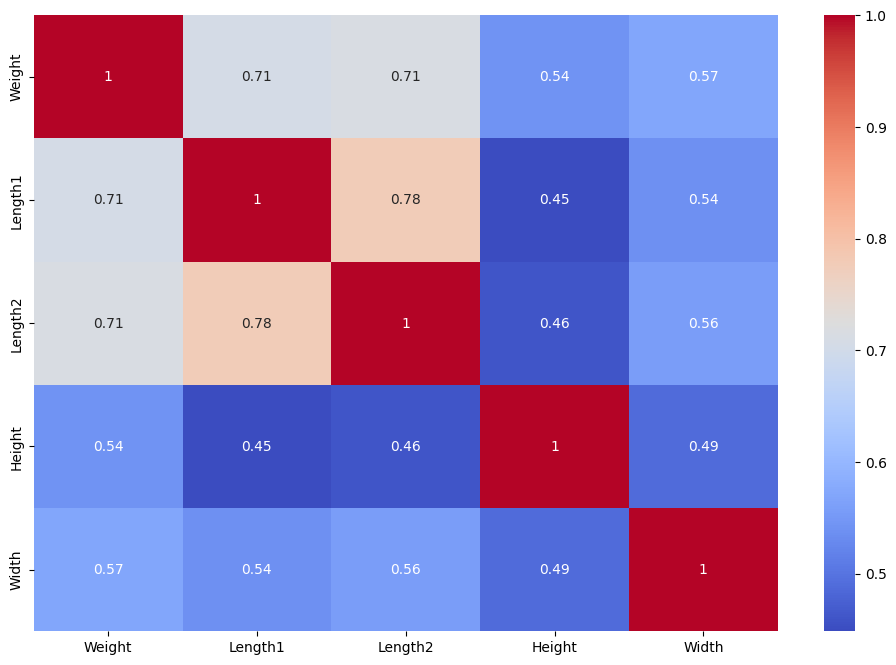

In [101]:
# Correlation matrix of numerical features
corr_mat = df_filtered_yj[columns_numerical].corr() 
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [102]:
print(corr_mat)

           Weight   Length1   Length2    Height     Width
Weight   1.000000  0.705276  0.714834  0.542212  0.570993
Length1  0.705276  1.000000  0.777623  0.448450  0.537906
Length2  0.714834  0.777623  1.000000  0.461016  0.558290
Height   0.542212  0.448450  0.461016  1.000000  0.488967
Width    0.570993  0.537906  0.558290  0.488967  1.000000


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Correlation Matrix</h2>

* `Length1` and `Length2` show a high correlation at `r=0.78`, which is of course expected as they're inter-related lengths.

* `Weight` has a positive corrleation with `Length1`, `Length2` and `Width`, indicating heavier fish tend to be longer and maybe wider (`r=0.54`).

* `Height` shows the weakest correlation with `Weight` and other features, implying that it may be a less predictive feature.
</div>

In [103]:
# Categorical column analysis - in this case, only 'Species' is categorical
columns_categorical = df_filtered_yj.select_dtypes(include=['object']).columns
for col in columns_categorical: 
    print(df_filtered_yj[col].value_counts())

Species
Perch        1056
Bream        1035
Roach        1017
Pike         1017
Smelt        1014
Parkki       1011
Whitefish    1006
Name: count, dtype: int64


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Categorical Column (Species)</h2>

* The distribution is not changed as there was no transformation in the end.

* Finally, we can use this DataFrame as `df_final`.

</div>

In [104]:
df_final = df_filtered_yj.copy()

In [105]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7156 entries, 0 to 7158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   7156 non-null   float64
 1   Length1  7156 non-null   float64
 2   Length2  7156 non-null   float64
 3   Height   7156 non-null   float64
 4   Width    7156 non-null   float64
 5   Species  7156 non-null   object 
dtypes: float64(5), object(1)
memory usage: 391.3+ KB


<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 5 – First Impressions</h1>

</div>

### Baseline

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Splitting DataFrame</h2>

* We'll define the features `X` and target variable `y`.

</div>

In [116]:
# Define feature and target variables
X = df_final.drop(columns=['Species'])  # Features
y = df_final['Species']  # Target variable

In [107]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the shapes of X_train, X_test, y_train and y_test
print(f"X_train shape after split: {X_train.shape}")
print(f"X_test shape after split: {X_test.shape}")
print(f"y_train shape after split: {y_train.shape}")
print(f"y_test shape after split: {y_test.shape}")

X_train shape after split: (5724, 5)
X_test shape after split: (1432, 5)
y_train shape after split: (5724,)
y_test shape after split: (1432,)


In [114]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

dummy_f1_macro = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='f1_macro') # For multiclass classification, with balanced classes
dummy_acc = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"F1 Macro: {dummy_f1_macro.mean()})")
print(f"Accuracy: {dummy_acc.mean()}")

F1 Macro: 0.14338472897972346)
Accuracy: 0.14342947445567533


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Baseline Explanation</h2>

* The stratified dummy classifier achieved an accuracy and macro-averaged F1 score of approximately 0.143, which aligns with random guessing for a balanced 7-class problem (expected chance level = 1/7).
* This confirms that equal F1 macro and accuracy suggest no inherent class imbalance.

</div>

### Two ML Algorithms - $A_1$ and $A_2$ 

<div class='alert alert-block alert-warning'>

Given that fish species classification is a multiclass problem with moderate feature correlations, **A₁: Random Forest** and **A₂: AdaBoost** were selected for the following reasons:

<h2 style='font-size: 18px; font-weight: bold'>A₁: Random Forest</h2>

* **Random forest** is an ensemble method that handles multiclass problems naturally, robust to correlated features (e.g., `Length1` and `Length2`), and provides feature importance insights.
* Its bagging approach reduces overfitting while maintaining high accuracy.  

<h2 style='font-size: 18px; font-weight: bold'>A₂: AdaBoost</h2>

* **AdaBoost** complements Random Forest by focusing on misclassified samples through boosting.
* It can iteratively improve predictions by weighting weak learners (e.g., decision stumps), making it effective for capturing nuanced patterns in morphological measurements like `Weight` and `Height`.

<h2 style='font-size: 18px; font-weight: bold'>Implementation / Further Transformation</h2>

The implementations of A₁ and A₂ in `scikit-learn` will be used in this manner:

**A₁: Random Forest**: `sklearn.ensemble.RandomForestClassifier`

* As an ensemble of deep decision trees, it requires no feature scaling since tree splits are based on value thresholds. The Yeo-Johnson transformation applied during preprocessing remains beneficial, as it normalises skewed distributions (particularly for `Weight` and `Length` measurements), creating more balanced split points during tree construction.
* `scikit-learn` implementation automatically handles both **one-hot encoded categorical variables** and multiclass classification via ensemble voting, while built-in feature randomization ensures robust performance even with correlated features (e.g. `Length1` and `Length2`).

**A₂: AdaBoost**: `sklearn.ensemble.AdaBoostClassifier`

* We can use decision stumps (single-split trees with `max_depth=1`) as base estimators. The default base estimator (`DecisionTreeClassifier(max_depth=1)`) ensures simplicity and avoids overfitting.
* Like Random Forest, it requires no feature scaling due to tree-based operations, though the Yeo-Johnson transformed features improve stump effectiveness by providing more meaningful split thresholds for variables like `Weight`.
* The **SAMME.R algorithm** natively supports **multiclass classification** by updating class probability estimates during each boosting iteration, and while categorical encoding isn't needed, the framework would similarly handle one-hot encoded features through its underlying tree structures.

</div>